Scattering rate formula 
$$
\Gamma \rho_{e} = \frac{\Gamma \Omega^2/4}{\delta^2+\Omega^2/2+\Gamma^2/4}
$$
or in terms of the saturation parameter
$$
\Gamma \rho_{e} = \frac{s_0 \Gamma/2}{1+s_0+(2\delta/\Gamma)^2}=\left(\frac{s_0}{1+s_0}\right)\left(\frac{\Gamma/2}{1+(2\delta/\Gamma)^2}\right)
$$
where 
$$
s_0 = 2 |\Omega|^2/\Gamma^2 = I/I_S
$$

And where 
$$I_s = \pi h c/3\lambda^3\tau$$

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline


del_t = 1e-9
t = np.arange(0,300e-6,del_t)



br = .22 #branching ratio

w_0 = 2*np.pi*658e12
gam=2*np.pi*18.9e6
d = 0

## given beam parameters get a rabi freq W
I = 2*2e-8/(np.pi*(150e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam*3*sc.c**2/(4*a*w_0**3))
W = E/sc.hbar*mu ##Rabi Frequency

s0 = 2*W**2/(gam**2)

I_s = (np.pi*sc.hbar*2*np.pi*sc.c)/(3*(4.556116382979e-7)**3*(1/gam))
                                 
sr = .22*(gam*W**2/4)/(d**2+W**2/2+gam**2/4)



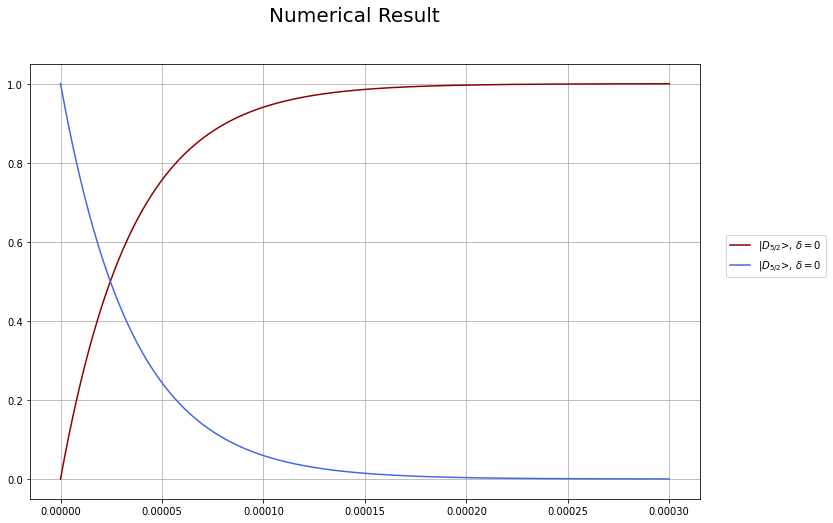

total time 0.802290678024292
final pop 0.9997907518056592


In [2]:
t0 = time.time()
pop_m = np.zeros(len(t))
pop_g = np.zeros(len(t))
pop_g[0] = 1.0
for i in range(1,len(t)):
    pop_m[i] = pop_m[i-1] + pop_g[i-1]*sr*del_t
    pop_g[i] = pop_g[i-1] - pop_g[i-1]*sr*del_t
                 
                 
                 
##Plotting Results###
plt.rcParams['figure.figsize'] = [12, 8]
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()


plt.plot(t,pop_m, color = 'darkred',label="|$D_{5/2}$>, $\delta = 0$ ")
plt.plot(t,pop_g, color = 'royalblue',label="|$D_{5/2}$>, $\delta = 0$ ")

plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()
t1 = time.time()
print('total time', t1-t0)


print('final pop', pop_m[len(pop_m)-1])